This notebook introduces a unique dataset that provides insights into the most popular songs of 2023 on Spotify. This dataset goes beyond the ordinary by offering a wealth of features that shed light on the musical landscape of the year. It provides a deep dive into track attributes, popularity metrics, and cross-platform presence, making it a valuable resource for music lovers, data analysts, and anyone interested in contemporary music culture.

With this dataset, you can discover the nuances of chart-topping songs, explore the intricacies of musical attributes, and uncover the trends that define the sound of 2023. Whether you are a music researcher, a data scientist, or simply a curious listener, this dataset invites you to explore, analyze, and appreciate the artistry that defines this year's most famous songs.

# 1. Importing Datasets

In [107]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-spotify-songs-2023/spotify-2023.csv


In [108]:
import pandas as pd

# Loading the dataset with 'ISO-8859-1' encoding
songs_data = pd.read_csv('/kaggle/input/top-spotify-songs-2023/spotify-2023.csv', encoding='ISO-8859-1')



# Display the first few rows of the dataset
songs_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [109]:
basic_stats = songs_data.describe()
basic_stats

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


**Cleaning the Data**

In [110]:
# Check data types of all columns
songs_data.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [111]:
# Remove non-numeric values from 'streams' column and convert to integer
songs_data['streams'] = pd.to_numeric(songs_data['streams'], errors='coerce')

songs_data["streams"].fillna(0, inplace=True)
songs_data["streams"] = songs_data["streams"].astype("int")

# Check data types again
songs_data.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

# 2. Lets Start the Analysis

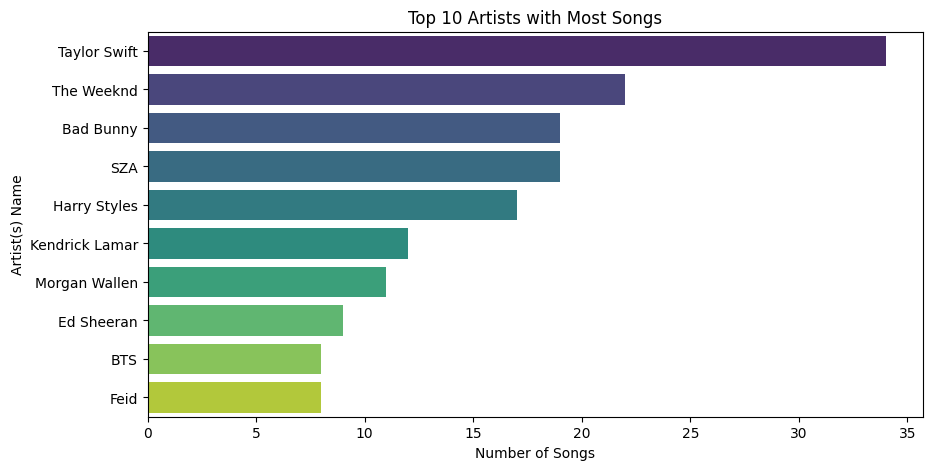

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 artists with most songs in the dataset
top_artists = songs_data['artist(s)_name'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.xlabel('Number of Songs')
plt.ylabel('Artist(s) Name')
plt.title('Top 10 Artists with Most Songs')
plt.show()

**These are the artists with the most songs in the dataset, ranked by number of songs.**

*     Taylor Swift: 34 songs
*     The Weeknd: 22 songs
*     Bad Bunny: 19 songs
*     SZA: 19 songs
*     Harry Styles: 17 songs
*     Kendrick Lamar: 12 songs
*     Morgan Wallen: 11 songs
*     Ed Sheeran: 9 songs
*     BTS: 8 songs
*     Feid: 8 songs



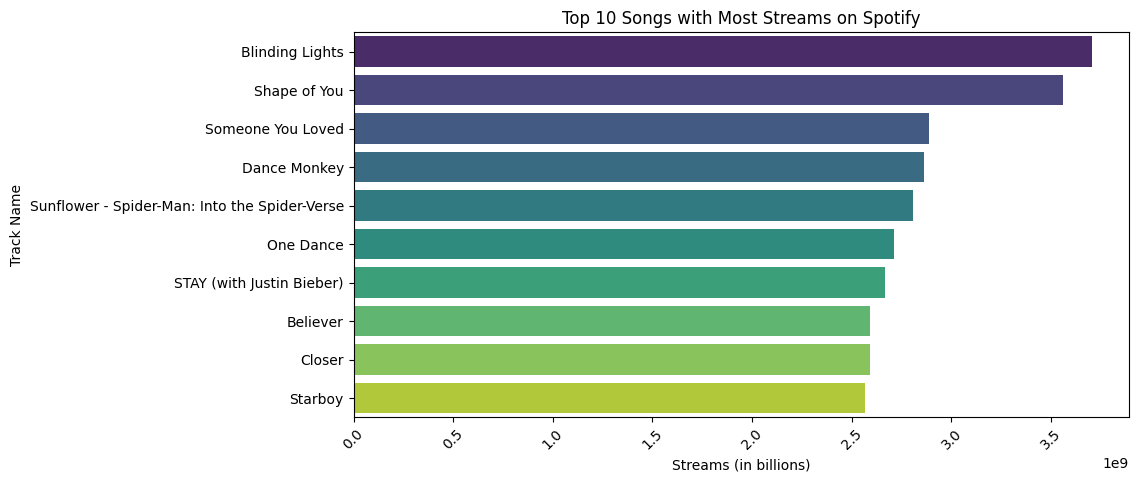

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3703895074
179,Shape of You,Ed Sheeran,3562543890
86,Someone You Loved,Lewis Capaldi,2887241814
620,Dance Monkey,Tones and I,2864791672
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2808096550
162,One Dance,"Drake, WizKid, Kyla",2713922350
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2665343922
140,Believer,Imagine Dragons,2594040133
725,Closer,"The Chainsmokers, Halsey",2591224264
48,Starboy,"The Weeknd, Daft Punk",2565529693


In [113]:
# Top 10 songs with most streams on Spotify
top_streams_spotify = songs_data[['track_name', 'artist(s)_name', 'streams']].sort_values(by='streams', ascending=False).head(10)

top_streams_spotify["streams"] = top_streams_spotify["streams"].astype("int")

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_streams_spotify['streams'], y=top_streams_spotify['track_name'], palette='viridis')
plt.xlabel('Streams (in billions)')
plt.ylabel('Track Name')
plt.title('Top 10 Songs with Most Streams on Spotify')
plt.xticks(rotation=45)
plt.show()

top_streams_spotify

 **Findings: The most stream song in Spotify is Blinding Lights by The Weeknd**

<img src="https://www.rollingstone.com/wp-content/uploads/2020/02/TheWeeknd.jpg" alt="drawing" width="400"/>



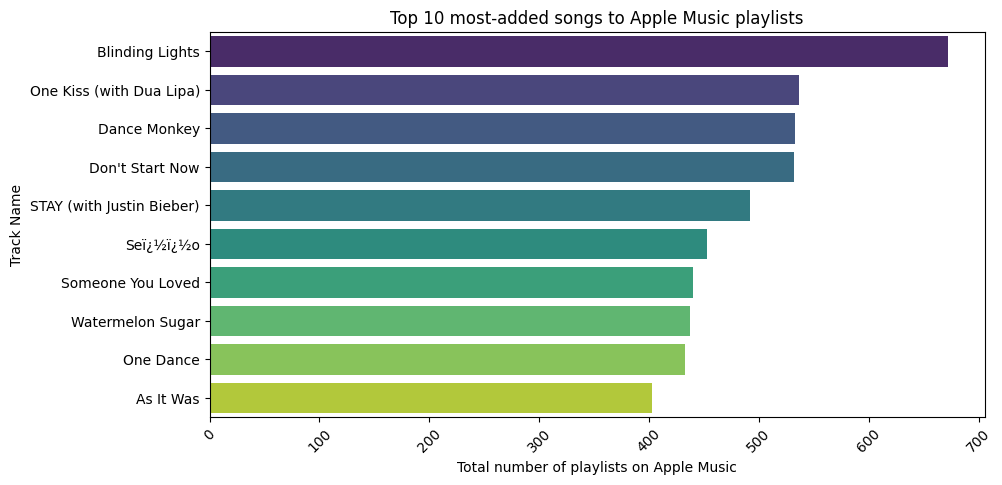

,track_name,artist(s)_name,in_apple_playlists
55,Blinding Lights,The Weeknd,672
403,One Kiss (with Dua Lipa),"Calvin Harris, Dua Lipa",537
620,Dance Monkey,Tones and I,533
407,Don't Start Now,Dua Lipa,532
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",492
693,Seï¿½ï¿½o,"Shawn Mendes, Camila Cabello",453
86,Someone You Loved,Lewis Capaldi,440
127,Watermelon Sugar,Harry Styles,437
162,One Dance,"Drake, WizKid, Kyla",433
14,As It Was,Harry Styles,403


In [114]:
# Top 10 songs with highest presence in Apple Music playlists
top_apple_playlists = songs_data[['track_name', 'artist(s)_name', 'in_apple_playlists']].sort_values(by='in_apple_playlists', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=top_apple_playlists['in_apple_playlists'], y=top_apple_playlists['track_name'], palette='viridis')
plt.xlabel('Total number of playlists on Apple Music')
plt.ylabel('Track Name')
plt.title('Top 10 most-added songs to Apple Music playlists')
plt.xticks(rotation=45)
plt.show()

top_apple_playlists

In [115]:
# Plot Top 10 artists with most streams on Spotify

grouped = songs_data[['artist(s)_name', 'streams']].groupby(['artist(s)_name']).sum('streams').reset_index()
grouped = grouped.sort_values('streams', ascending=False).head(10)
grouped

,artist(s)_name,streams
572,The Weeknd,14185552870
558,Taylor Swift,14053658300
159,Ed Sheeran,13908947204
223,Harry Styles,11608645649
43,Bad Bunny,9997799607
431,Olivia Rodrigo,7442148916
171,Eminem,6183805596
75,Bruno Mars,5846920599
25,Arctic Monkeys,5569806731
229,Imagine Dragons,5272484650


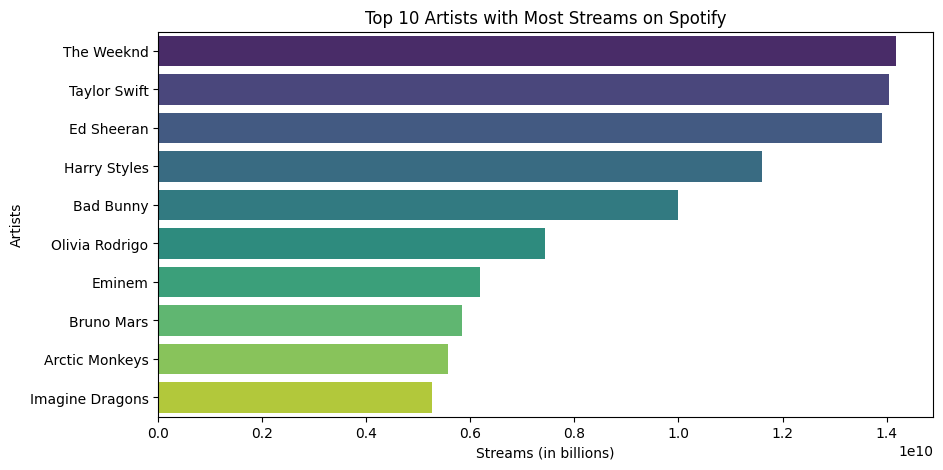

In [116]:

x=grouped['streams'].head(10)
y=grouped['artist(s)_name'].head(10)

# Plot the values
plt.figure(figsize=(10,5))
sns.barplot(x=x, y=y, palette='viridis')
plt.xlabel('Streams (in billions)')
plt.ylabel('Artists')
plt.title('Top 10 Artists with Most Streams on Spotify')
plt.xticks(rotation=0)

plt.show()

**Top 5 years with the hightest number of tracks**

In [117]:
# Let's revisit the top 5 years with the hightest number of tracks in the dataframe

songs_data.groupby(['released_year'])['released_year']                 \
                             .count()                                  \
                             .reset_index(name='count')                \
                             .sort_values(['count'], ascending=False)  \
                             .head(5)

,released_year,count
48,2022,402
49,2023,175
47,2021,119
46,2020,37
45,2019,36
